In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data = pd.read_csv(r"dirty_cafe_sales.csv")

In [3]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
print(data.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [6]:
#Numeric Columns: Convert Quantity, Price Per Unit, and Total Spent to numeric types:
data[['Quantity', 'Price Per Unit', 'Total Spent']] = data[['Quantity', 'Price Per Unit', 'Total Spent']].apply(pd.to_numeric, errors='coerce')

In [7]:

data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce', format='%Y-%m-%d')


In [8]:
#Replace "UNKNOWN" and "ERROR" with NaN for consistency:
data.replace(['UNKNOWN', 'ERROR', 'UnKNOWN'], pd.NA, inplace=True)

In [9]:
# List of numeric columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Fill missing values with the median of each column
for col in numeric_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)


C:\Users\SKULL\AppData\Local\Temp\ipykernel_18640\4095783206.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
C:\Users\SKULL\AppData\Local\Temp\ipykernel_18640\4095783206.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [10]:
# List of categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']

# Fill missing values with the mode (most frequent value) of each column
for col in categorical_cols:
    mode_value = data[col].mode().iloc[0]  # Get the most frequent value
    data[col].fillna(mode_value, inplace=True)


C:\Users\SKULL\AppData\Local\Temp\ipykernel_18640\3972576573.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [11]:
# Categorical Data Standardization
categorical_cols = ['Item', 'Payment Method', 'Location']

for col in categorical_cols:
    data[col] = data[col].str.upper()


In [12]:
#Check for duplicate Transaction ID:
data.drop_duplicates(subset=['Transaction ID'], inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [14]:
data.shape

(10000, 8)

In [15]:
data = data.dropna(subset=['Transaction Date'])


In [16]:
# See how many missing values exist in each column
print(data.isnull().sum())


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   float64       
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB


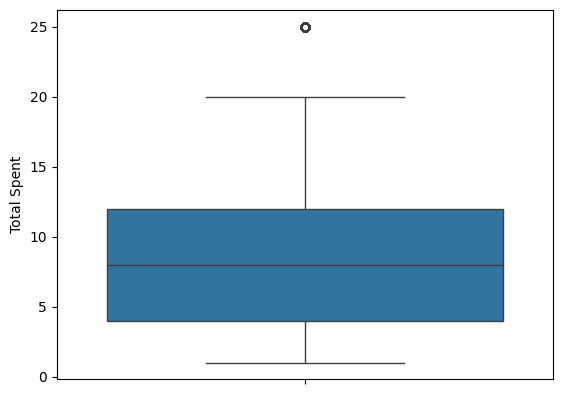

In [18]:
#detecting outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Total Spent'])
plt.show()


In [19]:
outlier_info = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = {
        'outlier_count': outliers.shape[0],
        'percent_of_data': 100 * outliers.shape[0] / data.shape[0]
    }

# Show summary
print(outlier_info)


{'Quantity': {'outlier_count': 0, 'percent_of_data': 0.0}, 'Price Per Unit': {'outlier_count': 0, 'percent_of_data': 0.0}, 'Total Spent': {'outlier_count': 250, 'percent_of_data': 2.620545073375262}}


In [20]:
import pandas as pd

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and filter out outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the rows where the column is within bounds
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Check the cleaned dataset
print("✅ Cleaned dataset shape:", data.shape)


✅ Cleaned dataset shape: (9290, 8)


In [21]:
outlier_info = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = {
        'outlier_count': outliers.shape[0],
        'percent_of_data': 100 * outliers.shape[0] / data.shape[0]
    }

# Show summary
import pprint
pprint.pprint(outlier_info)


{'Price Per Unit': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Quantity': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Total Spent': {'outlier_count': 0, 'percent_of_data': 0.0}}


In [22]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"Value counts in '{col}':")
    print(data[col].value_counts())
    print('-' * 40)


Value counts in 'Transaction ID':
Transaction ID
TXN_6170729    1
TXN_1961373    1
TXN_4977031    1
TXN_4271903    1
TXN_7034554    1
              ..
TXN_3765707    1
TXN_2847255    1
TXN_8915701    1
TXN_9437049    1
TXN_7619095    1
Name: count, Length: 9290, dtype: int64
----------------------------------------
Value counts in 'Item':
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
----------------------------------------
Value counts in 'Payment Method':
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64
----------------------------------------
Value counts in 'Location':
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
----------------------------------------


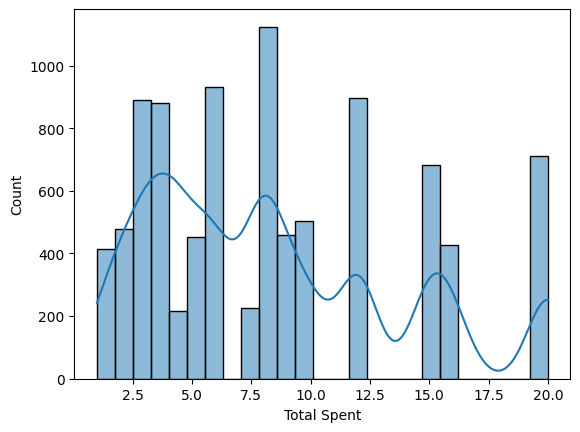

In [23]:
sns.histplot(data['Total Spent'], kde=True)
plt.show()


In [24]:
import numpy as np
data['Total Spent'] = np.log1p(data['Total Spent'])  


In [25]:
print("Unique counts for categorical variables:")
print("• Item:", data['Item'].nunique())
print("• Location:", data['Location'].nunique())
print("• Payment Method:", data['Payment Method'].nunique())


Unique counts for categorical variables:
• Item: 8
• Location: 2
• Payment Method: 3


In [26]:
# Define the columns to clean
cat_cols = ['Item', 'Location', 'Payment Method']

# Replace rare categories (appearing less than 10 times) with "Other"
for col in cat_cols:
    counts = data[col].value_counts()
    rare_categories = counts[counts < 10].index
    data[col] = data[col].replace(rare_categories, 'Other')


In [27]:
print("\nUpdated counts of unique categories:")
print(data['Item'].value_counts())
print(data['Location'].value_counts())
print(data['Payment Method'].value_counts())



Updated counts of unique categories:
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64


In [28]:

print("Duplicate rows:", data.duplicated().sum())


Duplicate rows: 0


In [29]:
data = data.drop_duplicates()


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9290 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9290 non-null   object        
 1   Item              9290 non-null   object        
 2   Quantity          9290 non-null   float64       
 3   Price Per Unit    9290 non-null   float64       
 4   Total Spent       9290 non-null   float64       
 5   Payment Method    9290 non-null   object        
 6   Location          9290 non-null   object        
 7   Transaction Date  9290 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 653.2+ KB


In [31]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,COFFEE,2.0,2.0,1.609438,CREDIT CARD,TAKEAWAY,2023-09-08
1,TXN_4977031,CAKE,4.0,3.0,2.564949,CASH,IN-STORE,2023-05-16
2,TXN_4271903,COOKIE,4.0,1.0,2.197225,CREDIT CARD,IN-STORE,2023-07-19
3,TXN_7034554,SALAD,2.0,5.0,2.397895,DIGITAL WALLET,TAKEAWAY,2023-04-27
4,TXN_3160411,COFFEE,2.0,2.0,1.609438,DIGITAL WALLET,IN-STORE,2023-06-11


In [32]:
# one-hot Encoding 
data = pd.get_dummies(data, columns=['Payment Method', 'Location', 'Item'], drop_first=True)


In [33]:
# Convert all bool columns to integers (0 and 1)
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [34]:
data.head()

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,Payment Method_CREDIT CARD,Payment Method_DIGITAL WALLET,Location_TAKEAWAY,Item_COFFEE,Item_COOKIE,Item_JUICE,Item_SALAD,Item_SANDWICH,Item_SMOOTHIE,Item_TEA
0,TXN_1961373,2.0,2.0,1.609438,2023-09-08,1,0,1,1,0,0,0,0,0,0
1,TXN_4977031,4.0,3.0,2.564949,2023-05-16,0,0,0,0,0,0,0,0,0,0
2,TXN_4271903,4.0,1.0,2.197225,2023-07-19,1,0,0,0,1,0,0,0,0,0
3,TXN_7034554,2.0,5.0,2.397895,2023-04-27,0,1,1,0,0,0,1,0,0,0
4,TXN_3160411,2.0,2.0,1.609438,2023-06-11,0,1,0,1,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Total Spent', 'Transaction ID'])
y = data['Total Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:

# Convert datetime column to datetime object (if not already)
X_train['Transaction Date'] = pd.to_datetime(X_train['Transaction Date'])
X_test['Transaction Date'] = pd.to_datetime(X_test['Transaction Date'])

# Extract useful features
for data in [X_train, X_test]:
    data['Year'] = data['Transaction Date'].dt.year
    data['Month'] = data['Transaction Date'].dt.month
    data['day'] = data['Transaction Date'].dt.day


# Drop the original datetime column
X_train = X_train.drop(columns=['Transaction Date'])
X_test = X_test.drop(columns=['Transaction Date'])


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.03581064707274536
R² Score: 0.8991292881764426


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.043105179317669086
R² Score: 0.8785821961769419


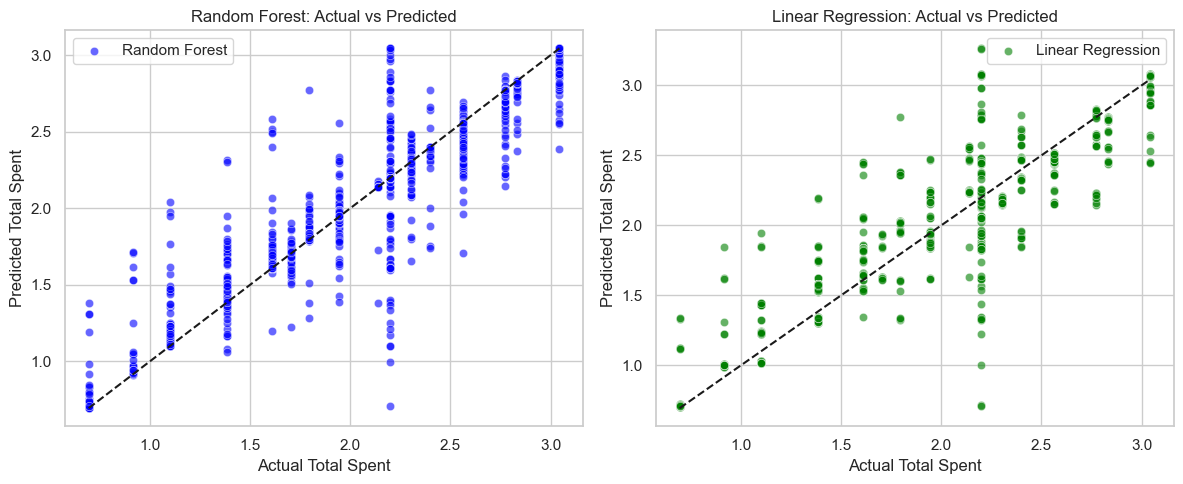

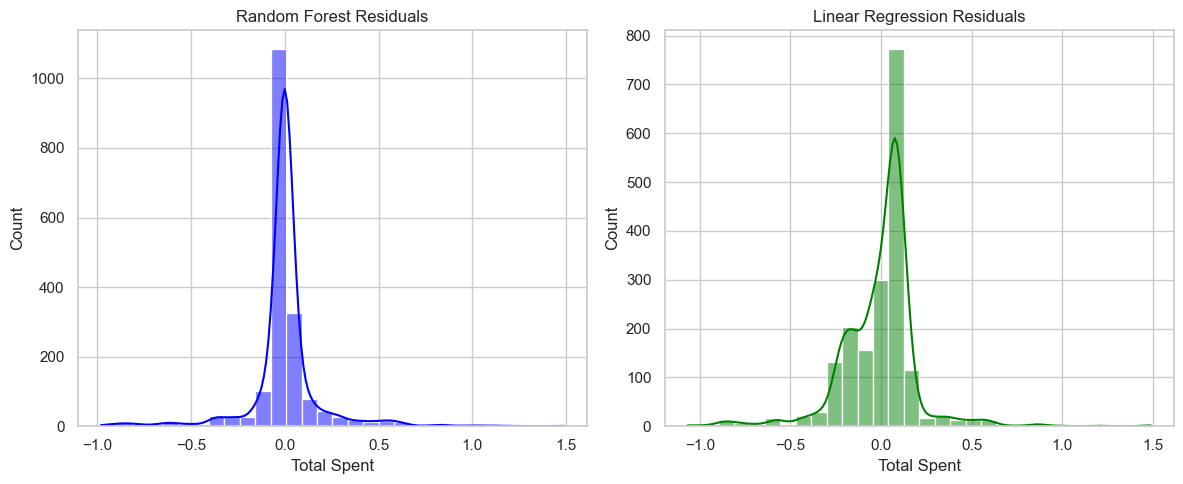

C:\Users\SKULL\AppData\Local\Temp\ipykernel_18640\1776817269.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, palette='pastel')
C:\Users\SKULL\AppData\Local\Temp\ipykernel_18640\1776817269.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=metrics_df, palette='pastel')


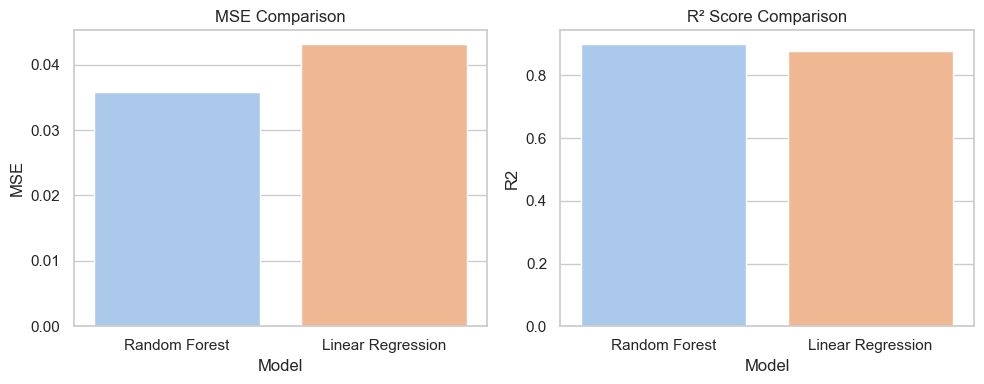

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure plots use a clean style
sns.set(style="whitegrid")

# Predict again for clarity
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='blue', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Total Spent')
plt.ylabel('Predicted Total Spent')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, color='green', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Total Spent')
plt.ylabel('Predicted Total Spent')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

residuals_rf = y_test - y_pred_rf
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_rf, bins=30, kde=True, color='blue')
plt.title("Random Forest Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_lr, bins=30, kde=True, color='green')
plt.title("Linear Regression Residuals")

plt.tight_layout()
plt.show()


metrics = {
    'Model': ['Random Forest', 'Linear Regression'],
    'MSE': [mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_lr)],
    'R2': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_lr)]
}

metrics_df = pd.DataFrame(metrics)

# Barplot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=metrics_df, palette='pastel')
plt.title("MSE Comparison")

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=metrics_df, palette='pastel')
plt.title("R² Score Comparison")

plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create a scoring function for MSE (negative because scikit-learn minimizes loss)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=mse_scorer)
rf_r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("Random Forest CV Results:")
print("Average MSE:", -np.mean(rf_mse_scores)) 
print("Average R²:", np.mean(rf_r2_scores))
print()


lr_model = LinearRegression()
lr_mse_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring=mse_scorer)
lr_r2_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

print("Linear Regression CV Results:")
print("Average MSE:", -np.mean(lr_mse_scores))
print("Average R²:", np.mean(lr_r2_scores))


Random Forest CV Results:
Average MSE: 0.04078231497727835
Average R²: 0.8884154866837445

Linear Regression CV Results:
Average MSE: 0.045796029757842596
Average R²: 0.8747471537688705
